## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 8
---------------------------------------

GOALS:

1. Load data into Python that you find online
2. Understand data types and fix some errors
3. Find your own data to play with

----------------------------------------------------------

This homework has **5 questions** and **1 problem**.

NOTE: Be kind to yourself. Working with data can be hard! Every data set is different. **Seriously** come get help! Come to lab!


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

You might need to install lxml. If you get a "ImportError: Missing optional dependency 'lxml'" Then uncomment and run the cell below

In [2]:
#!conda install -y lxml

## Try reading in some data - csv

Go to the [Cal Fire Website](https://www.fire.ca.gov/incidents) and scroll to the bottom to see the Incident Data. We will download the file named **ALL DATA AS CSV** this should put the data file into your Downloads folder. 

Next you need to move the file **mapdataall.csv** from your Downloads folder into your Day8 folder where you are doing your homework. You can open your Downloads folder and drag the file into JupyterLab side bar. Then I can run the command

    DF_raw = pd.read_csv('mapdataall.csv')

to load the data and look at the data frame.

In [3]:
# Your code here
DF = pd.read_csv('mapdataall.csv')

print(DF)

      incident_name incident_is_final  incident_date_last_update  \
0       Bridge Fire                 Y       2018-01-09T13:46:00Z   
1         Pala Fire                 Y       2020-09-16T14:07:35Z   
2        River Fire                 Y       2022-10-24T11:39:23Z   
3     Fawnskin Fire                 Y       2013-04-22T09:00:00Z   
4         Gold Fire                 Y       2013-05-01T07:00:00Z   
...             ...               ...                        ...   
3335      Lost Fire                 Y       2025-09-28T09:51:03Z   
3336   Martell Fire                 Y       2025-09-28T09:49:59Z   
3337      Cobb Fire                 Y       2025-09-29T07:12:14Z   
3338     Vleck Fire                 N  2025-09-30T13:00:14-07:00   
3339    Paloma Fire                 Y       2025-09-30T21:41:00Z   

     incident_date_created          incident_administrative_unit  \
0     2017-10-31T11:22:00Z       Shasta-Trinity National Forest    
1     2009-05-24T14:56:00Z               CAL FI

**Q1** How many variables and observations?
There are 23 variables and 3340 observations.

**Q2** How many different incident types are there? 23

**Q3** Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. You will probably need to make a mask to remove very small and very large fires. How many fires burned more than 100,000 acres? What is the largest fire in the data?

**Extra Q** EXTRA - CHALLENGE - See if you can create a graph that answers the question: Are fires getting bigger or more frequent over time? You get complete creative control on how to answer this question!

In [4]:
# Code for question 2
df = pd.DataFrame(pd.read_csv('mapdataall.csv'))
column_list = list(df.columns)
print(column_list)

['incident_name', 'incident_is_final', 'incident_date_last_update', 'incident_date_created', 'incident_administrative_unit', 'incident_administrative_unit_url', 'incident_county', 'incident_location', 'incident_acres_burned', 'incident_containment', 'incident_control', 'incident_cooperating_agencies', 'incident_longitude', 'incident_latitude', 'incident_type', 'incident_id', 'incident_url', 'incident_date_extinguished', 'incident_dateonly_extinguished', 'incident_dateonly_created', 'is_active', 'calfire_incident', 'notification_desired']


**(Click Here)**



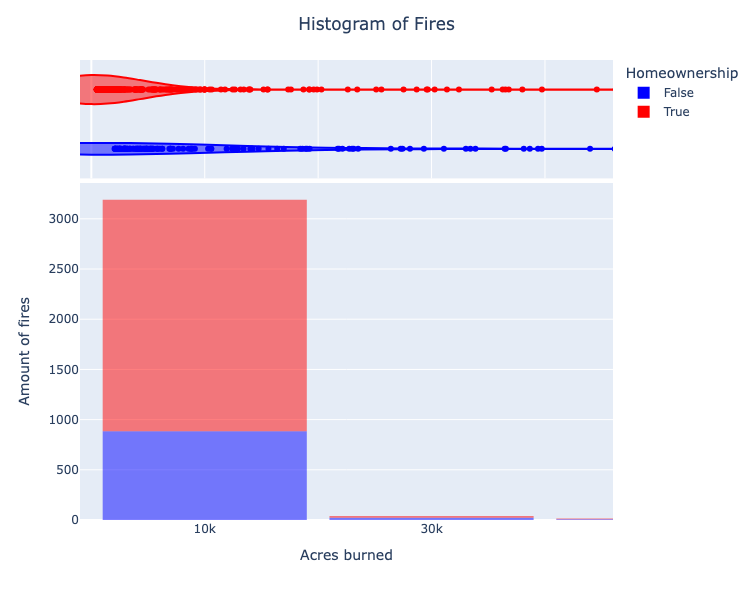

In [5]:
#Answer for question 3
fig = px.histogram(DF,
                   nbins=55,
                   x='incident_acres_burned',
                   color='calfire_incident',
                   opacity=0.5,
                  color_discrete_map={True: 'red', False: 'blue'},  # Adjust to your actual values
    marginal="violin"
)

fig.update_layout(bargap=0.1,
                  title='Histogram of Fires',
                  title_x=0.5,
                  xaxis={'range':[-1000, 46000]},
                  xaxis_title="Acres burned",
                  yaxis_title="Amount of fires",
                  legend_title="Homeownership",
                  autosize=False,
                  width=800,
                  height=600)
fig.show()

## Try reading in some data from Wikipedia - html

Here we will explore academy award winning films. Go to the [Wiki for the List of Academy Award Winning Films](https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films). Look at what type of data is there. How many tables? Any weird looking data?

Now we will read the html data into Python and show the data in DF[0]

In [6]:
# Here is some helper code
# This is code that will read in the data and then fix the Year column

#####
'''
NOTE: Many websites try to stop you from scraping even simple tables. 
    In just one year wikipedia made big changes... so I changed the code here.
    We can talk more about this code in class.
'''
import requests
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
response = requests.get(my_website, headers=headers)
#####

# Normal pandas code
DF = pd.read_html(response.content)
DF_raw = DF[0]
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: int(x.split('/')[0]))
DF_raw

,Film,Year,Awards,Nominations
0,Anora,2024,5,6
1,The Brutalist,2024,3,10
2,Emilia Pérez,2024,2,13
3,Wicked,2024,2,10
4,Dune: Part Two,2024,2,5
...,...,...,...,...
1382,The Yankee Doodle Mouse,1943,1,1
1383,The Yearling,1946,2,7
1384,"Yesterday, Today and Tomorrow (Ieri, oggi, dom...",1964,1,1
1385,You Can't Take It with You,1938,2,7


**Q4** Following along with the lecture notes or video, fix the data in the 'Awards' column.

In [7]:
# Your code here
DF_raw = DF[0]
display(DF_raw)

,Film,Year,Awards,Nominations
0,Anora,2024,5,6
1,The Brutalist,2024,3,10
2,Emilia Pérez,2024,2,13
3,Wicked,2024,2,10
4,Dune: Part Two,2024,2,5
...,...,...,...,...
1382,The Yankee Doodle Mouse,1943,1,1
1383,The Yearling,1946,2,7
1384,"Yesterday, Today and Tomorrow (Ieri, oggi, dom...",1964,1,1
1385,You Can't Take It with You,1938,2,7


In [8]:
DF_raw.describe()

,Year
count,1387.000000
mean,1976.350397
std,27.699346
min,1927.000000
25%,1952.000000
50%,1976.000000
75%,2001.000000
max,2024.000000


In [9]:
my_columns = ['Year', 'Awards', 'Nominations']
DF_raw[my_columns].describe()

,Year
count,1387.000000
mean,1976.350397
std,27.699346
min,1927.000000
25%,1952.000000
50%,1976.000000
75%,2001.000000
max,2024.000000


In [10]:
DF_raw.dtypes

Film           object
Year            int64
Awards         object
Nominations    object
dtype: object

In [11]:
year_data = DF_raw['Year'].value_counts()
DF_year = year_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_year


,Year,count
0,1945,21
1,1949,20
2,1942,20
3,1941,19
4,1950,19
...,...,...
92,1931,10
93,1932,9
94,1928,7
95,1929,6


In [12]:
DF_raw['Year'] = DF_raw['Year'].astype(str).apply(lambda x: x.split('/')[0])
year_data = DF_raw['Year'].value_counts()
DF_year = year_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_year

,Year,count
0,1945,21
1,1949,20
2,1942,20
3,1941,19
4,1950,19
...,...,...
92,1931,10
93,1932,9
94,1928,7
95,1929,6


In [13]:
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: int(x))
DF_raw.dtypes

Film           object
Year            int64
Awards         object
Nominations    object
dtype: object

In [14]:
award_data = DF_raw['Awards'].value_counts()
DF_award = award_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_award

,Awards,count
0,1,988
1,2,159
2,3,78
3,4,47
4,0 (1),32
5,5,26
6,6,12
7,7,12
8,1 (1),8
9,8,7


In [15]:
DF_raw['Awards'] = DF_raw['Awards'].apply(lambda x: int(x.split('(')[0]))
award_data = DF_raw['Awards'].value_counts()
DF_award = award_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_award

,Awards,count
0,1,996
1,2,160
2,3,79
3,4,48
4,0,36
5,5,27
6,7,13
7,6,13
8,8,8
9,11,3


In [16]:
DF_raw.dtypes

Film           object
Year            int64
Awards          int64
Nominations    object
dtype: object

**Q5** Now try to fix the data in the "Nominations" column - see if you can do it without looking at the answer.

In [17]:
# Your code here
nom_data = DF_raw['Nominations'].value_counts() #Looks at the column "Nominations"
DF_nom = nom_data.reset_index().rename(columns={"index": "value", 0: "count"}) #Turns it into a DF with numbered rows
display(DF_nom) #Displays the new DF

DF_raw['Nominations'] = DF_raw['Nominations'].apply(lambda x: int(x.split('[')[0]) if isinstance(x, str) else x) #Cleans up the nominations column
award_data = DF_raw['Awards'].value_counts() # Now it counts the unique values in the Awards column
DF_award = award_data.reset_index().rename(columns={"index": "value", 0: "count"}) #Turns that count series into a DF
display(DF_award) #Displays the DF

DF_raw.dtypes

,Nominations,count
0,1,554
1,2,143
2,4,113
3,5,106
4,3,104
5,6,79
6,7,75
7,8,62
8,10,41
9,9,31


,Awards,count
0,1,996
1,2,160
2,3,79
3,4,48
4,0,36
5,5,27
6,7,13
7,6,13
8,8,8
9,11,3


Film           object
Year            int64
Awards          int64
Nominations     int64
dtype: object

## Problem 1

Your homework today will be to see if you can find some data of your own. This can be the first steps you take toward your final project. 

You should:

* Find some data online
* Read that data into Python using the Pandas commands we learned
* Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.
* Try to do summary statistics (.describe()). Does it work like expected?
* Attempt to fix any data, or explain why the data does not need to be fixed.
* Make some sort of graph using columns in your data.

In [18]:
!git clone https://github.com/jldbc/pybaseball
!cd pybaseball
!pip install -e .

fatal: destination path 'pybaseball' already exists and is not an empty directory.
Obtaining file:///Users/dylan/Data%20101%20work/MyWorkingDirectory-Data101/Day8
ERROR: file:///Users/dylan/Data%20101%20work/MyWorkingDirectory-Data101/Day8 does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [20]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
from typing import List, Optional

def team_batting_bref(team, start_season=None, end_season=None):
    """
    Get season-level Batting Statistics for Specific Team (from Baseball-Reference)

    ARGUMENTS:
    team : str : The Team Abbreviation (i.e. 'NYY' for Yankees) of the Team you want data for
    start_season : int : first season you want data for (or the only season if you do not specify an end_season)
    end_season : int : final season you want data for
    """
    if start_season is None:
        raise ValueError(
            "You need to provide at least one season to collect data for. Try team_batting_bref(season) or team_batting_bref(start_season, end_season)."
        )
    if end_season is None:
        end_season = start_season

    url = "https://www.baseball-reference.com/teams/{}".format(team)

    raw_data = []
    headings: Optional[List[str]] = None
    # Create a session object for making HTTP requests
    session = requests.Session()
    
    for season in range(start_season, end_season+1):
        print("Getting Batting Data: {} {}".format(season, team))
        stats_url = "{}/{}.shtml".format(url, season)
        response = session.get(stats_url)
        soup = BeautifulSoup(response.content, 'html.parser')

        table = soup.find_all('table', {'class': 'sortable stats_table'})[0]

        if headings is None:
            headings = [row.text.strip() for row in table.find_all('th')[1:28]]

        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            cols = [col.replace('*', '').replace('#', '') for col in cols]  # Removes '*' and '#' from some names
            cols = [col for col in cols if 'Totals' not in col and 'NL teams' not in col and 'AL teams' not in col]  # Removes Team Totals and other rows
            cols.insert(2, season)
            raw_data.append([ele for ele in cols[0:]])

    assert headings is not None
    headings.insert(2, "Year")
    data = pd.DataFrame(data=raw_data, columns=headings) # [:-5]  # -5 to remove Team Totals and other rows
    data = data.dropna()  # Removes Row of All Nones

    return data
    display(DataFrame)